In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [416]:
df=pd.read_csv("data.txt",header=None,names=['population','profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### EDA on whole dataset

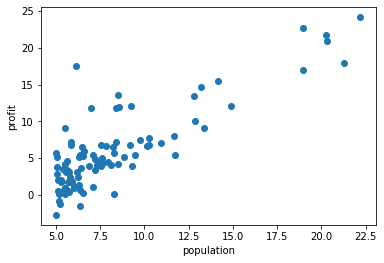

In [417]:
plt.scatter(df['population'],df['profit'])
plt.xlabel("population")
plt.ylabel("profit")
plt.show()

### Splitting into training and test sets

In [418]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

### EDA for training set

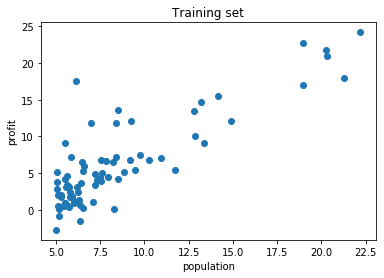

In [419]:
plt.scatter(train['population'],train['profit'])
plt.xlabel("population")
plt.ylabel("profit")
plt.title("Training set")
plt.show()

### EDA for test set

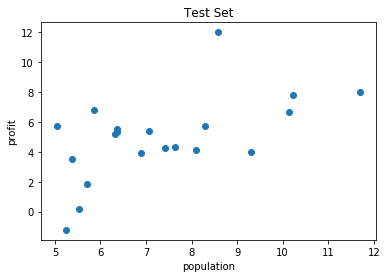

In [420]:
plt.scatter(test['population'],test['profit'])
plt.xlabel("population")
plt.ylabel("profit")
plt.title("Test Set")
plt.show()

### Initializing parameters 

In [421]:
m=train.shape[0]
X=train['population']
y=train['profit']
theta=[0,0] 
h=theta[1]*X+theta[0]
epochs=1000
alpha=0.01

### Costfunction for linear regression

In [422]:
def compute_cost(m,X,y,theta):
    h=theta[1]*X+theta[0]
    return (1/(2*m)*np.sum(h-y)**2)
print ("Cost before optimisation for training set:",compute_cost(m,X,y,theta))

Cost before optimisation for training set: 1418.7344304624028


### Gradient_descent for linear regression

In [423]:
def gradient_descent(theta,m,X,y,alpha,epochs): 
    for i in range(epochs):
        h = theta[1]*X + theta[0]  
        temp1 = (-2/m) * sum(X * (y - h)) 
        temp0 = (-2/m) * sum(y - h)
        theta[1] = theta[1] - alpha * temp1  
        theta[0] = theta[0] - alpha * temp0
    return theta[0],theta[1]
theta[0],theta[1]=gradient_descent(theta,m,X,y,alpha,epochs)   
theta[1],theta[0]

(1.2035220950525607, -3.9853223583850292)

### Cost after optimising

In [424]:
print ("Cost after optimisation for training set:",compute_cost(m,X,y,theta))

Cost after optimisation for training set: 0.00899511408294948


### Some predictions:

In [425]:
print ("Predicted profit for population=35000 is",theta[1]*35000+theta[0])
print ("Predicted profit for population=70000 is",theta[1]*70000+theta[0])

Predicted profit for population=35000 is 42119.28800448124
Predicted profit for population=70000 is 84242.56133132086


### Scatterplot and regression line for training data

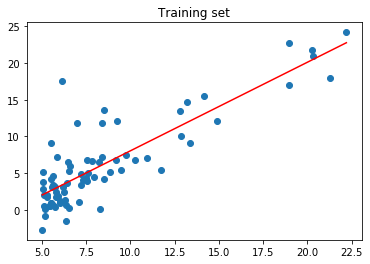

In [426]:
h = theta[1]*X + theta[0]
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(h), max(h)], color='red')
plt.title("Training set")
plt.show()

In [427]:
m=test.shape[0]
X=test['population']
y=test['profit']

### Cost for test set

In [428]:
print ("Cost after optimisation for test set:",compute_cost(m,X,y,theta))

Cost after optimisation for test set: 0.06090817726571777


### Scarterplot and regression line for test data

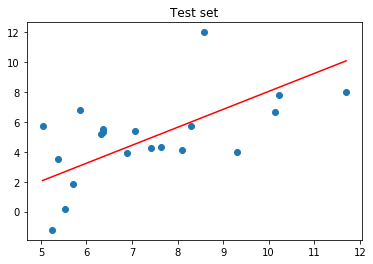

In [429]:
h = theta[1]*X + theta[0]
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(h), max(h)], color='red')
plt.title("Test set")
plt.show()

### Linear Regression using scikit-learn

In [430]:
from sklearn import linear_model
regr=linear_model.LinearRegression(normalize=True)
train_x=np.asanyarray(train[['population']])
train_y=np.asanyarray(train[['profit']])
regr.fit(train_x,train_y) #training the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [431]:
print ("Coefficients from sklearn are:",regr.coef_,regr.intercept_)

Coefficients from sklearn are: [[1.21087699]] [-4.06215322]


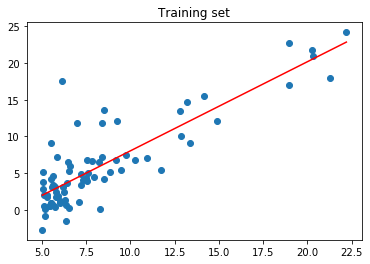

In [432]:
h = regr.coef_*train_x + regr.intercept_
plt.scatter(train_x, train_y) 
plt.title("Training set")
plt.plot([min(train_x), max(train_x)], [min(h), max(h)], color='red')
plt.show()

In [433]:
test_x=np.asanyarray(test[['population']])
test_y=np.asanyarray(test[['profit']])
test_y_=regr.predict(test_x) #predicting for test data

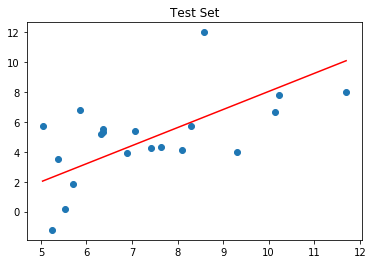

In [434]:
h = regr.coef_*test_x + regr.intercept_
plt.scatter(test_x, test_y) 
plt.title("Test Set")
plt.plot([min(test_x), max(test_x)], [min(h), max(h)], color='red')
plt.show()

### Cost with theta predicted by sklearn

In [435]:
theta_sk=[regr.intercept_,regr.coef_]
print ("Cost with sklearn ",costfunction(test.shape[0],test_x,test_y,theta_sk))

Cost with sklearn  0.10151563227837


### Since our implementation has a lower cost than the cost from sklearn, our algorithm works better!